In [1]:
!pip install mlxtend==0.17.3

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
import time
import datetime
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) 
    test_X, test_Y =   sklearn.datasets.make_moons(n_samples=100, noise=.2) 
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y.ravel(), s=40, cmap=plt.cm.Spectral);
    train_X = train_X
    train_Y = train_Y.reshape((train_Y.shape[0],1))
    test_X = test_X
    test_Y = test_Y.reshape((test_Y.shape[0],1))
    return train_X, train_Y, test_X, test_Y

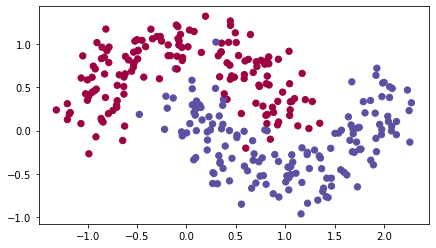

In [5]:
train_x, train_y, test_x, test_y = load_dataset()

In [6]:
print("Shape\nTrain_x: {0} \t Train_y: {1}\nTest_x: {2} \t Test_y: {3}\n".format(train_x.shape,train_y.shape,test_x.shape,test_y.shape))

Shape
Train_x: (300, 2) 	 Train_y: (300, 1)
Test_x: (100, 2) 	 Test_y: (100, 1)



In [7]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(self.begins))

  def on_train_end(self, logs=None):
    print('Duration (seconds) {}'.format(time.time() - self.begins))

In [8]:
def print_analysis(titles,history):
  loss = ["loss", "val_loss"]
  accuracy = ["binary_accuracy","val_binary_accuracy"]
  f, axs = plt.subplots(1,3,figsize=(10,4))
  
  for i,item in enumerate([loss,accuracy]):
    if i == 1:
      axs[i].set_title(titles)
    axs[i].plot(history.history[item[0]])
    axs[i].plot(history.history[item[1]])
    axs[i].set_ylabel(item[0])
    axs[i].set_xlabel('epoch')
    axs[i].legend(['train', 'test'], loc='best')
  
  plot_decision_regions(test_x,test_y.squeeze(), clf=model,zoom_factor=2.0, ax=axs[2])
  plt.tight_layout()
  plt.show()

In [9]:
# Configure the random seed for the reproducibility purposes
tf.random.set_seed(3)

# Instantiate a simple classification model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(2, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(1, activation = tf.nn.sigmoid,kernel_initializer="he_uniform")
                             ])

# Instantiate a logistic loss function that expects integer targets (binary classification 0 or 1)
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0007)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=0)

Training: begins at 1641986544.3622205
Duration (seconds) 27.01917314529419


In [10]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

10/10 [==============================] - 0s 3ms/step - loss: 0.4852 - binary_accuracy: 0.8100
Train loss: 0.485 - acc: 0.810
4/4 [==============================] - 0s 748us/step - loss: 0.4813 - binary_accuracy: 0.8000
Test loss: 0.481 - acc: 0.800


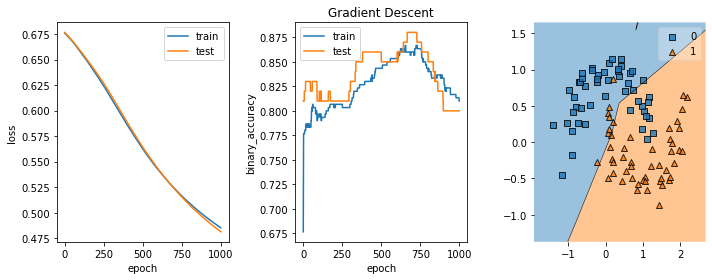

In [11]:
print_analysis("Gradient Descent",history)

In [24]:
# Configure the random see for the reproducibility purposes
tf.random.set_seed(3)

# Instantiate a simple classification model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(2, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(1, activation = tf.nn.sigmoid,kernel_initializer="he_uniform")
                             ])

# Instantiate a logistic loss function that expects integer targets (binary classification 0 or 1)
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0007,momentum=0.9) #, decay=0.01

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=0)

Training: begins at 1642031013.8457224
Duration (seconds) 21.16072416305542


In [25]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

10/10 [==============================] - 0s 798us/step - loss: 0.5715 - binary_accuracy: 0.8400
Train loss: 0.571 - acc: 0.840
4/4 [==============================] - 0s 490us/step - loss: 0.5737 - binary_accuracy: 0.8600
Test loss: 0.574 - acc: 0.860


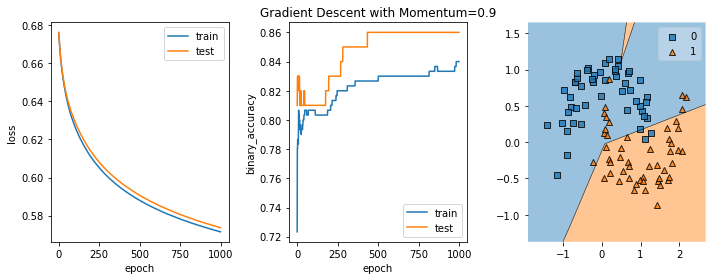

In [26]:
print_analysis("Gradient Descent with Momentum=0.9",history)

In [36]:
# Configure the random see for the reproducibility purposes
tf.random.set_seed(3)

# Instantiate a simple classification model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(2, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(1, activation = tf.nn.sigmoid,kernel_initializer="he_uniform")
                             ])

# Instantiate a logistic loss function that expects integer targets (binary classification 0 or 1)
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.0007,momentum=0.9)
#optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.0007, initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad')
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0007, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,name='RMSprop')

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=0)

Training: begins at 1642031446.3745875
Duration (seconds) 22.022743940353394


In [37]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

10/10 [==============================] - 0s 698us/step - loss: 0.0904 - binary_accuracy: 0.9667
Train loss: 0.090 - acc: 0.967
4/4 [==============================] - 0s 748us/step - loss: 0.0751 - binary_accuracy: 0.9600
Test loss: 0.075 - acc: 0.960


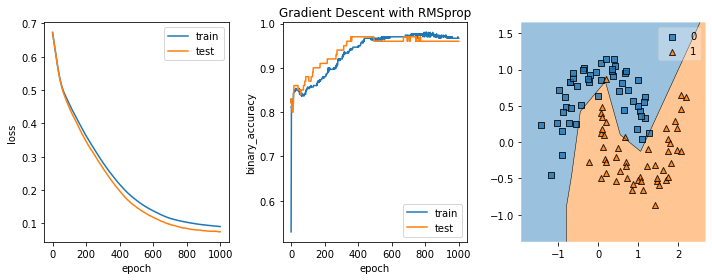

In [38]:
# print_analysis("Gradient Descent with RMSprop",history)
# Problemas com callbacks

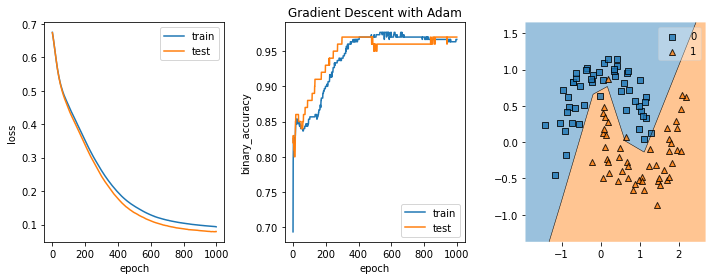

In [35]:
# print_analysis("Gradient Descent with Adam",history)
# Foi melhor

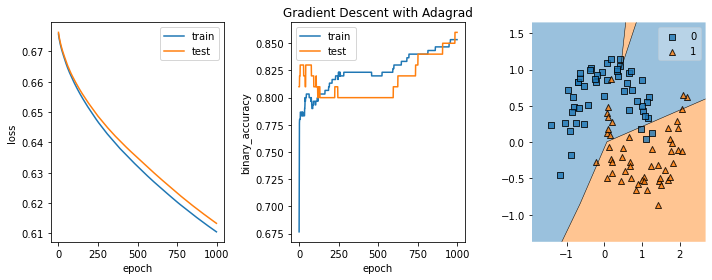

In [32]:
#print_analysis("Gradient Descent with Adagrad",history)
# Foi Ruim

In [39]:
# fit a model and plot learning curve
def fit_model(label,trainX, trainy, testX, testy, lrate=0.0007, momentum=0.9, decay=0):

    # Configure the random see for the reproducibility purposes
    tf.random.set_seed(3)

    # Instantiate a simple classification model
    model = tf.keras.Sequential([
                                tf.keras.layers.Dense(5, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                                tf.keras.layers.Dense(2, activation=tf.nn.relu,kernel_initializer="he_uniform"),
                                tf.keras.layers.Dense(1, activation = tf.nn.sigmoid,kernel_initializer="he_uniform")
                                ])

    # Instantiate a logistic loss function that expects integer targets (binary classification 0 or 1)
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # Instantiate an optimizer.
    optimizer = tf.keras.optimizers.SGD(learning_rate=lrate,momentum=momentum, decay=decay)

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

    # training 
    history = model.fit(x=trainX,
                        y=trainy,
                        batch_size=32,
                        epochs=1000,
                        validation_data=(testX,testy),
                        callbacks=[MyCustomCallback()],
                        verbose=0)

    plt.plot(history.history['binary_accuracy'], label='train')
    plt.plot(history.history['val_binary_accuracy'], label='test')
    if label == "lrate":
      plt.title(label+'='+str(lrate), pad=-50)
    elif label == "momentum":
      plt.title(label+'='+str(momentum), pad=-50)
    else:
      plt.title(label+'='+str(decay), pad=-50)

Training: begins at 1642031642.737835
Duration (seconds) 21.727136850357056
Training: begins at 1642031664.6825547
Duration (seconds) 26.14406156539917
Training: begins at 1642031690.9346914
Duration (seconds) 24.87691378593445
Training: begins at 1642031715.8624291
Duration (seconds) 28.047635793685913
Training: begins at 1642031743.959834
Duration (seconds) 22.577051877975464
Training: begins at 1642031766.5964465
Duration (seconds) 22.665095806121826
Training: begins at 1642031789.372249
Duration (seconds) 29.016552209854126
Training: begins at 1642031818.4995127
Duration (seconds) 28.049894332885742


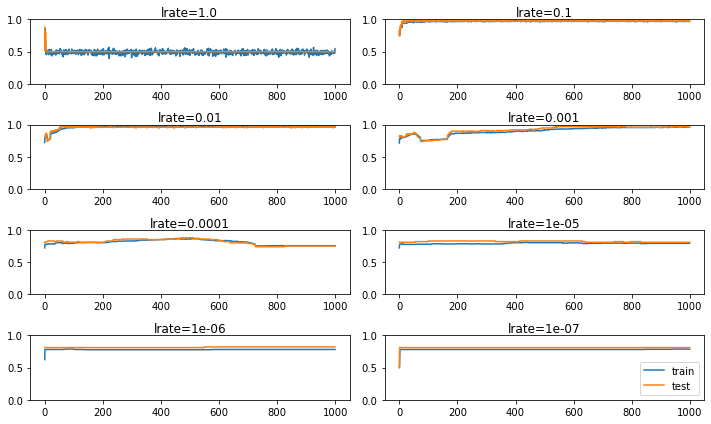

In [40]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

fig = plt.figure(figsize=(10, 6))

for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	fig.add_subplot(plot_no,ylim=(0,1))
	#plt.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model("lrate",train_x, train_y, test_x, test_y, learning_rates[i])
# show learning curves
plt.legend()
plt.tight_layout()
plt.show()

Training: begins at 1642031847.971048
Duration (seconds) 31.084105968475342
Training: begins at 1642031879.134957
Duration (seconds) 30.74172854423523
Training: begins at 1642031909.940516
Duration (seconds) 29.6798198223114
Training: begins at 1642031939.6862316
Duration (seconds) 28.268497943878174


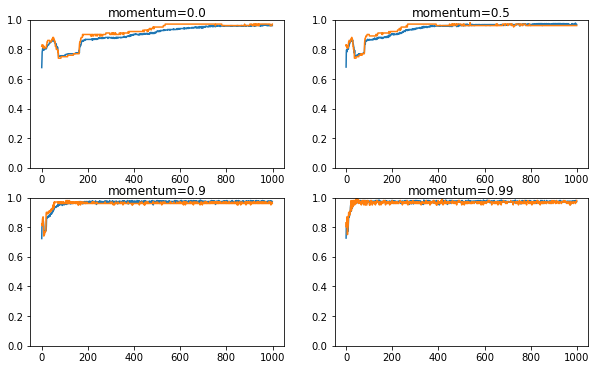

In [41]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]

fig = plt.figure(figsize=(10, 6))

for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    fig.add_subplot(plot_no,ylim=(0,1))
    # fit model and plot learning curves for a momentum
    fit_model("momentum",train_x, train_y, test_x, test_y, lrate=0.01, momentum=momentums[i])
# show learning curves
plt.show()

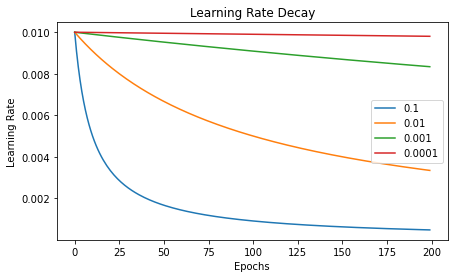

In [42]:
# learning rate decay
def	decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200

for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	plt.plot(lrates, label=str(decay))
plt.legend(loc="best")
plt.title("Learning Rate Decay")
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.show()

Training: begins at 1642032045.9482229
Duration (seconds) 21.79935622215271
Training: begins at 1642032067.86128
Duration (seconds) 35.56858038902283
Training: begins at 1642032103.6058054
Duration (seconds) 27.884729146957397
Training: begins at 1642032131.5473967
Duration (seconds) 30.05686354637146


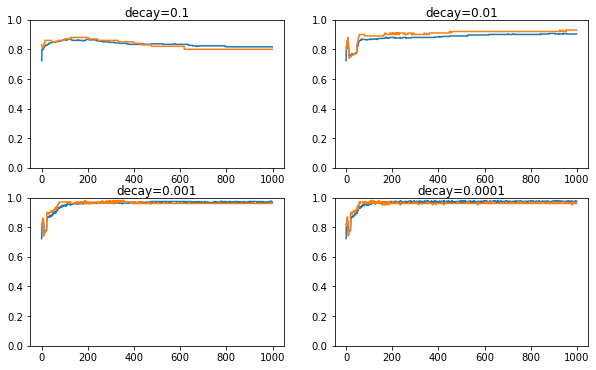

In [43]:
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]

fig = plt.figure(figsize=(10, 6))

for i in range(len(decay_rates)):
    # determine the plot number
    plot_no = 220 + (i+1)
    fig.add_subplot(plot_no,ylim=(0,1))
    # fit model and plot learning curves for a momentum
    fit_model("decay",train_x, train_y, test_x, test_y, lrate=0.01, momentum=0.9, decay=decay_rates[i])
# show learning curves
plt.show()